In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

2023-11-22 09:47:45.975484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 09:47:46.807557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
DATA_PATH = "../Data55toAmplitude"

FEATURES_FOLDER = f"{DATA_PATH}/plfluxes_simplepoly__pllabdata_20230625a_superK_slmcube_20230625_complsines-01sp_04/"
LABELS_FOLDER = f"{DATA_PATH}/slmcube_20230625_complsines-01sp_07_PSFWFs_file00/"

FEATURES_FILE_PATH = f"{FEATURES_FOLDER}/all_fluxes.npy"

LABELS_FILE_PATH = f"{LABELS_FOLDER}/complexsine_pupamp.npy"

In [4]:
fluxes_array = np.load(FEATURES_FILE_PATH)[0:10000]
amplitudes_array = np.load(LABELS_FILE_PATH)

NameError: name 'FEATURES_FILE_PATH' is not defined

In [4]:
fluxes_array.shape

(10000, 55, 24)

In [5]:
amplitudes_array.shape

(10000, 96, 96)

In [6]:
amplitudes_array[0]

array([[0.75529766, 0.74080541, 0.72492366, ..., 0.74851699, 0.74374716,
        0.73740004],
       [0.74385875, 0.72808223, 0.71098318, ..., 0.74748685, 0.74128712,
        0.733548  ],
       [0.73117559, 0.71416848, 0.69591074, ..., 0.74510106, 0.73749828,
        0.72840051],
       ...,
       [0.71020046, 0.72198665, 0.73240433, ..., 0.65933348, 0.67975827,
        0.69911217],
       [0.71787564, 0.72840051, 0.73749828, ..., 0.67649959, 0.69591074,
        0.71416848],
       [0.72432959, 0.733548  , 0.74128712, ..., 0.69265279, 0.71098318,
        0.72808223]])

In [7]:
fig = px.imshow(amplitudes_array[0])
fig.show()

In [8]:
fig = px.imshow(fluxes_array[0])

In [9]:
fig.show()

In [10]:
def plot_model_history(
    history):
    """
    Plots the history of the model in a graph

    Input:
        history (): The training history of the model

    Returns:
        None
    """
    results = pd.DataFrame(history.history)
    results.plot(figsize=(8,5))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()

    return None


In [11]:
fluxes_array = fluxes_array.reshape(10000, 55*24)
fluxes_array.shape

(10000, 1320)

In [12]:
model = models.Sequential([layers.InputLayer(input_shape=fluxes_array[0].shape),
                          layers.Dense(1024, activation='relu'),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(1024, activation='relu'),
                          layers.Dense(96 * 96, activation='linear'),
                          layers.Reshape((96,96))
                          ])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(fluxes_array, amplitudes_array, epochs=100, batch_size=16, validation_split=0.2)

2023-11-21 13:48:27.462774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-21 13:48:27.496326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-21 13:48:27.496587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2023-11-21 13:48:30.558277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-21 13:48:30.563042: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0aa3e8c2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-21 13:48:30.563068: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-21 13:48:30.567746: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-21 13:48:30.750827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-21 13:48:30.873094: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

500/500 [==============================] - 5s 5ms/step - loss: 89.4577 - val_loss: 0.0501
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0324 - val_loss: 0.0295
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0288 - val_loss: 0.0295
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0288 - val_loss: 0.0295
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0288 - val_loss: 0.0295
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0289 - val_loss: 0.0295
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0289 - val_loss: 0.0295
Epoch 8/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0289 - val_loss: 0.0295
Epoch 9/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0289 - val_loss: 0.0295
Epoch 10/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0289 - val_loss: 0.0296


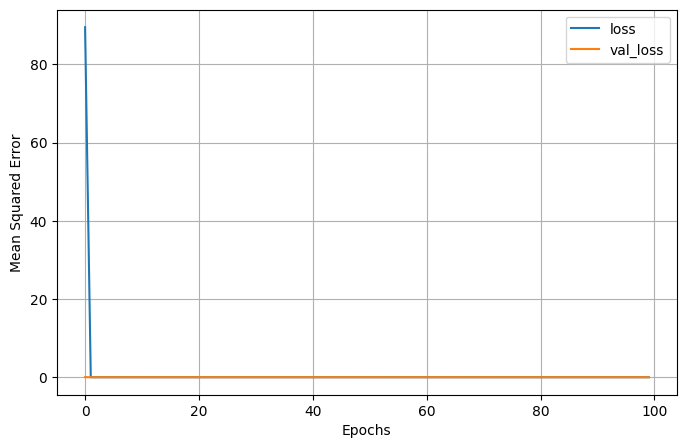

In [13]:
plot_model_history(history)

In [14]:
fig = px.imshow(amplitudes_array[4])
fig.show()
im = model.predict(fluxes_array[4].reshape(1, 1320))
print(fluxes_array[0].reshape(1, 55, 24))
print(fluxes_array[0])
fig = px.imshow(im[0])
fig.show()

1/1 [==============================] - 0s 70ms/step
[[[ 525.5    712.327  857.139 ... 1385.53  1274.248  930.112]
  [ 221.06   404.502  727.024 ...  477.1    588.697  561.227]
  [ 372.477  511.366  713.259 ...  301.975  428.136  416.271]
  ...
  [ 181.267  199.039  290.146 ...  382.527  278.703  225.516]
  [ 371.59   344.726  298.876 ...  273.598  286.006  241.276]
  [ 413.485  336.133  189.326 ...  180.484  239.789  238.953]]]
[525.5   712.327 857.139 ... 180.484 239.789 238.953]


Another

In [15]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=fluxes_array[0].shape))
# Adding a fully connected layer with 128 units and 'relu' activation function
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
# Adding the output layer with 10 units (for example, for 10 classes) and 'softmax' activation function
model.add(layers.Dense(96 * 96, activation='linear'))
model.add(layers.Reshape((96,96)))
# Printing the summary of the model architecture
model.summary()


# Compilation hyperparameters
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
metric = tf.keras.metrics.MeanSquaredError()

model.compile(loss=loss_function,optimizer=optimizer,metrics=[metric])
history = model.fit(fluxes_array, amplitudes_array, epochs=100, batch_size=16, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              1352704   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dense_9 (Dense)             (None, 9216)              9446400   
                                                                 
 reshape_1 (Reshape)         (None, 96, 96)           

500/500 [==============================] - 2s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 93/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 94/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 95/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 96/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 97/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 98/100
500/500 [=======

In [3]:
fig = px.imshow(amplitudes_array[3])
fig.show()
im = model.predict(fluxes_array[3].reshape(1, 1320))
print(fluxes_array[0].reshape(1, 55, 24))
print(fluxes_array[0])
fig = px.imshow(im[0])
fig.show()

NameError: name 'amplitudes_array' is not defined

Another

In [17]:
fluxes_array = np.load(FEATURES_FILE_PATH)[0:10000]
amplitudes_array = np.load(LABELS_FILE_PATH)

In [18]:
model = models.Sequential()
input_shape = fluxes_array[0].shape + (1, )
# Adding a convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Adding a max-pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding another convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Adding another max-pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 3D output to 1D tensor for a fully connected layer
model.add(Flatten())

# Adding a fully connected layer with 128 units and 'relu' activation function
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))

# Adding the output layer with 10 units (for example, for 10 classes) and 'softmax' activation function
model.add(layers.Dense(96 * 96, activation='linear'))
model.add(layers.Reshape((96,96)))
# Printing the summary of the model architecture
model.summary()


# Compilation hyperparameters
loss_function = tf.keras.losses.MeanSquaredError()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
metric = tf.keras.metrics.MeanSquaredError()

model.compile(loss=loss_function,optimizer=optimizer,metrics=[metric])
history = model.fit(fluxes_array, amplitudes_array, epochs=100, batch_size=16, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 11, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 9, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

500/500 [==============================] - 3s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 90/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 91/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 92/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 93/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 94/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 95/100
500/500 [=======

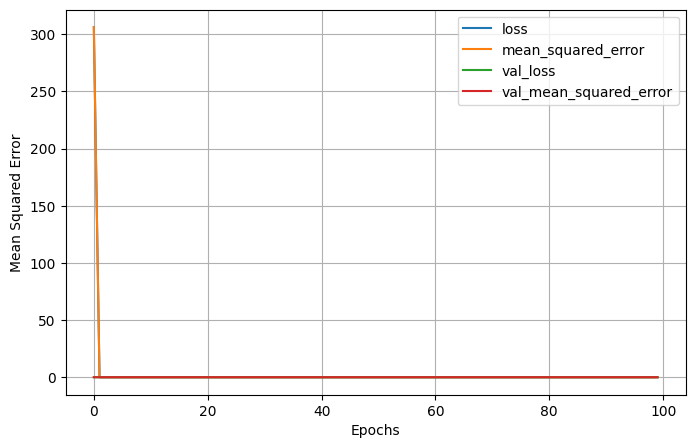

In [19]:
plot_model_history(history)

In [20]:
fig = px.imshow(amplitudes_array[3])
fig.show()
im = model.predict(fluxes_array[3].reshape(1, 55, 24))
print(fluxes_array[0].reshape(1, 55, 24))
print(fluxes_array[0])
fig = px.imshow(im[0])
fig.show()

1/1 [==============================] - 0s 119ms/step
[[[ 525.5    712.327  857.139 ... 1385.53  1274.248  930.112]
  [ 221.06   404.502  727.024 ...  477.1    588.697  561.227]
  [ 372.477  511.366  713.259 ...  301.975  428.136  416.271]
  ...
  [ 181.267  199.039  290.146 ...  382.527  278.703  225.516]
  [ 371.59   344.726  298.876 ...  273.598  286.006  241.276]
  [ 413.485  336.133  189.326 ...  180.484  239.789  238.953]]]
[[ 525.5    712.327  857.139 ... 1385.53  1274.248  930.112]
 [ 221.06   404.502  727.024 ...  477.1    588.697  561.227]
 [ 372.477  511.366  713.259 ...  301.975  428.136  416.271]
 ...
 [ 181.267  199.039  290.146 ...  382.527  278.703  225.516]
 [ 371.59   344.726  298.876 ...  273.598  286.006  241.276]
 [ 413.485  336.133  189.326 ...  180.484  239.789  238.953]]
